## Digital Technologies and Data-Driven Business
# Exercises for Session 13

<img src="https://upload.wikimedia.org/wikipedia/commons/6/69/Airbnb_Logo_Bélo.svg" alt="Airbnbn Logo" style="width: 200px;"/>

Alright, here's the plan: In this exercise, you'll dive into inferential statistics. You're going to explore statistical relationships, correlations, and play around with some of Python's key statistical libraries.

You'll be working with the Airbnb dataset again. Just a heads-up, make sure to use the dataset specifically for this exercise class. 

**Note:** For this exercise, it's not just about the code. Your write-up, written tasks, are super important too! Make sure it clearly shows you get the methods and can explain the results you find. Have fun!

So - Annabelle spread the word to Timothy and from Timothy its reached C-level. From the HQ in San Francisco the directors of Airbnb are working out the strategy for the coming year. One of the directors, Sophie, is therefore curious about knowing more about the different factors that are driving the market, which are important? are they influenced by each other? And so on..

Let's get to it !

## Part 1: Set up environment and load/prepare data

### Install library sklearn for machine learning and regression

### Import libraries

In [8]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
print("lib loaded")

lib loaded


### Task 1
**Load dataset**

In [9]:
### Write your code here
d= pd.read_csv('airbnb_final_data_new1.csv') 
df=pd.DataFrame(d)

### Task 2
__Sophie__: _Thank you so much for helping me out with this, first I'm a bit curious on how the data is structured, could you maybe show me the first 15 rows of the dataset?_

In [10]:
### Write your code here
df.head(15)

,host_total_listings_count,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,40,6,30.0,6.0,1771,1,1125,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8,16,13.0,6.0,1610,2,1125,1,1.00,1.00,1.00,4.00,4.00,4.00,1.00,0.05
2,8,16,13.0,24.0,4000,2,1125,4,4.75,4.75,4.50,5.00,5.00,4.75,4.50,0.14
3,8,15,12.0,22.0,2900,2,1000,19,4.42,4.42,4.47,4.68,4.79,4.21,4.68,0.55
4,1,12,7.0,8.0,2500,6,50,52,4.74,4.60,4.56,4.89,4.85,4.72,4.80,0.44
5,1,12,7.0,6.0,2000,5,1125,1,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.02
6,1,15,7.0,12.0,3500,2,1125,5,5.00,5.00,4.80,5.00,5.00,5.00,4.80,0.14
7,3,16,6.0,10.0,4000,3,8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,3,12,6.0,6.0,2500,5,1125,1,5.00,5.00,5.00,4.00,5.00,5.00,4.00,0.01
9,2,12,6.0,8.0,2643,2,1125,42,4.86,4.86,4.81,4.98,5.00,4.71,4.78,0.59


## Part 2: Data exploration
Before you begin the actual analysis, it is always good practice to do some data exploration to get an understanding of the data you are working with. Also, Sophie is quite curious on the data foundation that the analysis is made upon. 

**Note**: When you do the basic data exploration, remember to use print() statements or text to explain accordingly. This makes it much easier for Sophie to understand the results!

### Task 3
__Sophie__: _Wow, it's well structured the data, that's great! How many rows and columns do we have to work with? And how many missing values are there in each column?_

In [11]:
### Write your code here
df.isnull().sum()

host_total_listings_count        0
accommodates                     0
bedrooms                       132
beds                            54
price                            0
minimum_nights                   0
maximum_nights                   0
number_of_reviews                0
review_scores_rating           856
review_scores_accuracy         891
review_scores_cleanliness      891
review_scores_checkin          891
review_scores_communication    891
review_scores_location         891
review_scores_value            891
reviews_per_month              856
dtype: int64

The output might be hard to read but there are zero missing values according to the code but a brief look shows that some entries don't have values in certain places

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7285 entries, 0 to 7284
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_total_listings_count    7285 non-null   int64  
 1   accommodates                 7285 non-null   int64  
 2   bedrooms                     7153 non-null   float64
 3   beds                         7231 non-null   float64
 4   price                        7285 non-null   int64  
 5   minimum_nights               7285 non-null   int64  
 6   maximum_nights               7285 non-null   int64  
 7   number_of_reviews            7285 non-null   int64  
 8   review_scores_rating         6429 non-null   float64
 9   review_scores_accuracy       6394 non-null   float64
 10  review_scores_cleanliness    6394 non-null   float64
 11  review_scores_checkin        6394 non-null   float64
 12  review_scores_communication  6394 non-null   float64
 13  review_scores_loca

### Task 4
__Sophie__: _Nice. And just to know what information we actually have  - what are the names of the columns we have in the dataset?_

In [13]:
### Write your code here
print(df.columns)

Index(['host_total_listings_count', 'accommodates', 'bedrooms', 'beds',
       'price', 'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month'],
      dtype='object')


### Task 5

__Sophie__: _Super. So the other day I had a discussion with a colleague because he claimed that we have less than 100,000 reviews stored at the moment - can that really be true based on the data you have?_

In [14]:
### Write your code here´
reviews=len(df.axes[0])
print(reviews)

7285


Text answer here: it cannot since the total number of rows is less than 10000 but this does not cover the situation in which there is more than 1 review per row or if reviews for a listing is in a list inside the dataframe

In [15]:
df= pd.read_csv('airbnb_final_data_new1.csv') 
print(df.info('number_of_reviews'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7285 entries, 0 to 7284
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_total_listings_count    7285 non-null   int64  
 1   accommodates                 7285 non-null   int64  
 2   bedrooms                     7153 non-null   float64
 3   beds                         7231 non-null   float64
 4   price                        7285 non-null   int64  
 5   minimum_nights               7285 non-null   int64  
 6   maximum_nights               7285 non-null   int64  
 7   number_of_reviews            7285 non-null   int64  
 8   review_scores_rating         6429 non-null   float64
 9   review_scores_accuracy       6394 non-null   float64
 10  review_scores_cleanliness    6394 non-null   float64
 11  review_scores_checkin        6394 non-null   float64
 12  review_scores_communication  6394 non-null   float64
 13  review_scores_loca

### Task 6

__Sophie__: _One of the main KPIs for us is to keep the review scores, on average, above 4.5. Can you check if we have succeeded in that? Additionally what are 25, 50, and 75 percentile?_

In [16]:
### Write your code here
df= pd.read_csv('airbnb_final_data_new1.csv') 
df['review_scores_rating'].describe()

count    6429.000000
mean        4.767827
std         0.450155
min         0.000000
25%         4.700000
50%         4.870000
75%         5.000000
max         5.000000
Name: review_scores_rating, dtype: float64

Text answer here: the average here is 4.76 with each percentile respectively being 4.7 4.87 and 5.00

### Task 7

__Sophie__: _Also, can you maybe show me, just in a table or the like, how the different variables in the dataset correlate with each other? Maybe see if there are any interesting insights to be derived from such table?_

Hint `.corr()` can be used for generating correlation matrices

In [17]:
df.corr()

,host_total_listings_count,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
host_total_listings_count,1.000000,0.108483,0.054095,0.140053,0.071523,-0.037837,0.189400,-0.065508,-0.154718,-0.177854,-0.140592,-0.289050,-0.333756,-0.042857,-0.235325,0.096810
accommodates,0.108483,1.000000,0.780542,0.765252,0.209074,-0.020566,0.065610,0.004608,-0.044404,-0.064433,-0.056467,-0.006436,-0.029787,-0.023840,-0.039916,-0.003969
bedrooms,0.054095,0.780542,1.000000,0.731262,0.159700,-0.005846,0.038875,-0.038774,-0.019681,-0.026869,-0.023175,0.031193,0.013345,-0.012016,0.004217,-0.092975
beds,0.140053,0.765252,0.731262,1.000000,0.157329,-0.013429,0.051055,0.003243,-0.047966,-0.056838,-0.039319,-0.014477,-0.025527,-0.026461,-0.033015,-0.044597
price,0.071523,0.209074,0.159700,0.157329,1.000000,-0.010235,0.014060,0.019488,-0.028798,-0.028445,0.000347,-0.014274,-0.045524,0.043143,-0.034941,0.070866
minimum_nights,-0.037837,-0.020566,-0.005846,-0.013429,-0.010235,1.000000,0.007281,-0.013042,-0.009321,-0.023537,-0.023551,0.000687,-0.001236,0.000481,-0.012815,-0.039640
maximum_nights,0.189400,0.065610,0.038875,0.051055,0.014060,0.007281,1.000000,0.040948,-0.032925,-0.051524,-0.030772,-0.072813,-0.072556,-0.005345,-0.072197,-0.002764
number_of_reviews,-0.065508,0.004608,-0.038774,0.003243,0.019488,-0.013042,0.040948,1.000000,0.020572,0.007004,0.032336,0.018607,0.009541,0.004440,-0.027950,0.592943
review_scores_rating,-0.154718,-0.044404,-0.019681,-0.047966,-0.028798,-0.009321,-0.032925,0.020572,1.000000,0.731779,0.689183,0.498514,0.572185,0.369656,0.758606,0.004669
review_scores_accuracy,-0.177854,-0.064433,-0.026869,-0.056838,-0.028445,-0.023537,-0.051524,0.007004,0.731779,1.000000,0.572718,0.506990,0.574424,0.314281,0.666673,-0.039331


<Axes: >

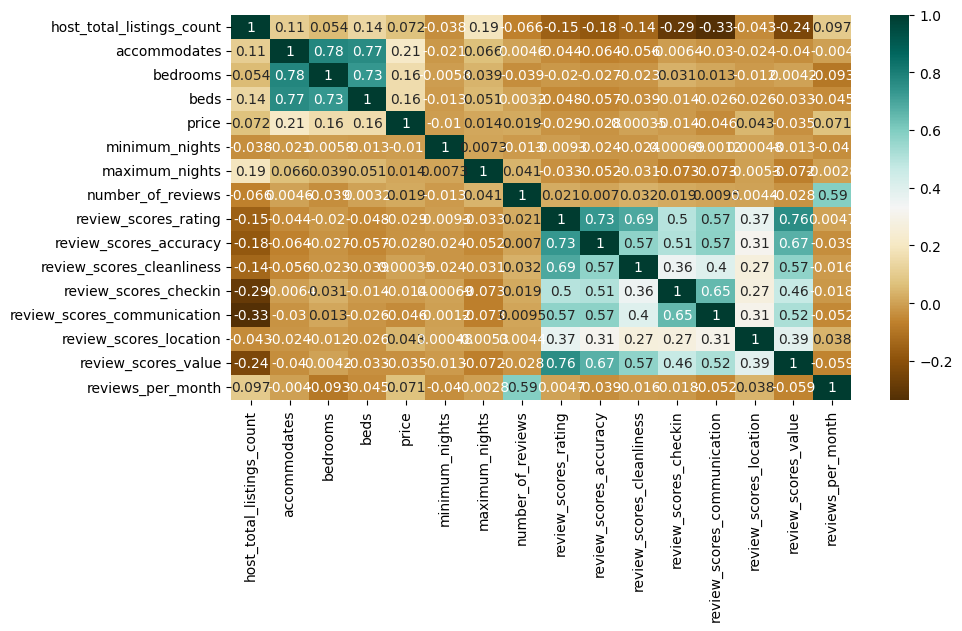

In [18]:
### Write your code here
import seaborn as sns
plt.figure(figsize=(10,5))
c = df.corr()
sns.heatmap(c,cmap="BrBG", annot=True)

### Task 8

__Sophie__: _Another hypothesis is that hosts with many listings often struggle to communicate effectively with guests because of the sheer volume of interactions. Does our data suggest any correlation between the total number of listings a host has `host_total_listings_count` and the quality of communication `review_scores_communication`?_

_Intuitively, one might also think that the more reviews a listing has, the more frequently it receives reviews. Could you verify this for me? How closely related are the total `number_of_reviews` and the `reviews_per_month`? If there's a strong correlation, it might suggest that our top-reviewed listings continue to garner attention, doesn't it?_

_Can you verify the above? Please describe the correlation for me, and help me elaborate on why it is as it is?_


In [19]:
### Write your code here
print(df['host_total_listings_count'].corr(df['review_scores_communication']))
print(df['number_of_reviews'].corr(df['reviews_per_month']))

-0.33375558632839103
0.5929430844233499


Text answer here: so the correlation between total listings and communication score is a negative value which suggests that as total listings increase go up the communication goes down or as the communication goes up the amount of total listings will go down this is in contrast to the correlation to number of reviews and reviews per month which has a positive value which suggests that they move in tandem so if the number of values increase then the reviews per month should also increase.

### Task 9
__Sophie__: _This is so interesting. Is it possible to make some kind of plot to vizualise the relationship between `number_of_reviews` and `reviews_per_month`? Sometimes that makes it easier to understand. Also, how does such vizualisation correspond to the correlation value you found above (task 8)?_

Hint matplotlib has a function called scatter() that can generate scatterplots. You can access it through `plt.scatter()`

<Axes: xlabel='number_of_reviews', ylabel='reviews_per_month'>

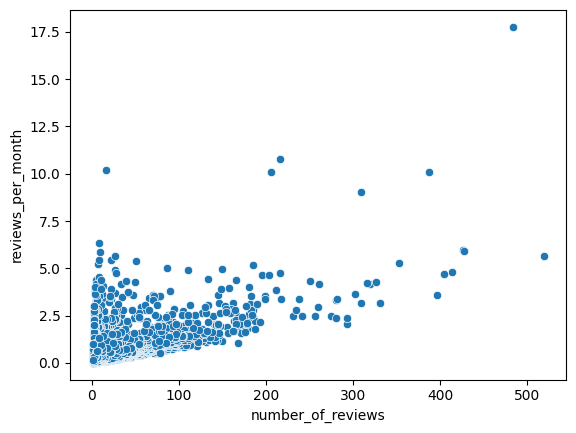

In [20]:
### Write your code here
sns.scatterplot(data=df, x='number_of_reviews', y='reviews_per_month')

Text answer here: this plot shows us how the 2 values correlate as the two had a value of 0.59 we can expect the values to move in tandem so as number of reviews go up the reviews per month will also go up

## Part 3: Inferential statistics

__Sophie__: _Another hypothesis we have is that the more reviews a listing has, the higher its price is. In general we are curious abot knowing more about what factors that actually determines the price of a listing so we know what to prioritize and how to help hosts earn more money. I've heard about this technique called linear regression, but I have no clue on how to do it myself. Do you think we can create such model, that can help us by describing the relationship between price and the remaining variables?_

Hint: Use sklearn as you installed earlier, this is a python library for machine learning. You already imported its `LinearRegression()` model, so you are all set!

### Task 10

__Sophie__: _Before we start creating the model, can you explain to me what we would call the target variable in this case? And what is the predictor variable(s)?_

Text answer here: the target variable would be price and predictor variables would be all the other variables in the dataset

### Task 11
__Sophie__: _To get a clean dataset, is it possible to first remove all rows that contain empty values?_

Hint: Empty values contains 'na' and can be removed using `.dropna(axis= 0,how='any')`

In [21]:
### Write your code here

df_clean=df.dropna(axis= 0,how='any')
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7285 entries, 0 to 7284
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_total_listings_count    7285 non-null   int64  
 1   accommodates                 7285 non-null   int64  
 2   bedrooms                     7153 non-null   float64
 3   beds                         7231 non-null   float64
 4   price                        7285 non-null   int64  
 5   minimum_nights               7285 non-null   int64  
 6   maximum_nights               7285 non-null   int64  
 7   number_of_reviews            7285 non-null   int64  
 8   review_scores_rating         6429 non-null   float64
 9   review_scores_accuracy       6394 non-null   float64
 10  review_scores_cleanliness    6394 non-null   float64
 11  review_scores_checkin        6394 non-null   float64
 12  review_scores_communication  6394 non-null   float64
 13  review_scores_loca

In [22]:
print(df_clean.isna().sum())

host_total_listings_count      0
accommodates                   0
bedrooms                       0
beds                           0
price                          0
minimum_nights                 0
maximum_nights                 0
number_of_reviews              0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
reviews_per_month              0
dtype: int64


### Task 12
__Sophie__: _Awesome. Now I know that all incomplete observations are long gone. Well, then I will let you do your magic - Linear Regression!!_

Hint - Follow these steps:
1) Assign the target variable to an object 'y' and the predictor variable(s) to an object 'x'

2) Initiate the LinearRegression model and fit it to the data

In [23]:
### Write your code here

df_noprice=df_clean.drop(axis= 1, labels= 'price')

Y=df_clean['price'].to_frame()
x=df_noprice
#X=df_noprice[df_noprice['host_total_listings_count'],df_noprice['accommodates'],df_noprice['bedrooms'],df_noprice['beds'],df_noprice['minimum_nights'],df_noprice['maximum_nights'],df_noprice['number_of_reviews'],df_noprice['review_scores_rating'],df_noprice['review_scores_accuracy'],df_noprice['review_scores_cleanliness'],df_noprice['review_scores_checkin'],df_noprice['review_scores_communication'],df_noprice['review_scores_location'],df_noprice['review_scores_value'],df_noprice['reviews_per_month'],]

linreg=LinearRegression().fit(x,Y)
linreg.score(x,Y)


0.05814225034318865

### Task 13

__Sophie__: _That was fast. Wow. Can you maybe print the coefficients for each of the predictor variables for me?_

Hint: Use `list(zip(x, model.coef_))` to print the coefficients in a manageable way  

In [24]:
### Write your code here
bd=linreg.coef_
linco=bd.flatten()

linco.tolist()

coef_series = pd.Series( data=linco, index=linreg.feature_names_in_)

print(coef_series)

host_total_listings_count       14.797132
accommodates                   195.968934
bedrooms                        12.429479
beds                             7.447626
minimum_nights                  -0.508437
maximum_nights                  -0.007078
number_of_reviews               -0.622750
review_scores_rating           -85.894687
review_scores_accuracy          11.904178
review_scores_cleanliness      203.829160
review_scores_checkin          147.842762
review_scores_communication   -301.696007
review_scores_location         499.787058
review_scores_value           -227.371382
reviews_per_month              164.585232
dtype: float64


In [25]:
print(x.shape[1])
print(x.shape[0])

15
6237


Text answer here:

### Task 14
__Sophie__: _And what is the R2 score of the model? Can you tell me its value, and what that value means?_

Hint: Use `.score(x,y)` to get the R2 score

In [27]:
### Write your code here
print(linreg.score(x,Y))

0.05814225034318865


Text answer here:

### Task 15
__Sophie__: _Cool. And now, you are the expert here, can you maybe help me understand the coefficients on three of the variables: `accomodates`, `review_scores_cleanliness` and `number_of_reviews`? Its direction and magnitude - what does it mean, and how should I interpret them?_

In [199]:
linco=bd.flatten()

linco.tolist()

coef_series = pd.Series( data=linco, index=linreg.feature_names_in_)

print(coef_series)

host_total_listings_count       14.797132
accommodates                   195.968934
bedrooms                        12.429479
beds                             7.447626
minimum_nights                  -0.508437
maximum_nights                  -0.007078
number_of_reviews               -0.622750
review_scores_rating           -85.894687
review_scores_accuracy          11.904178
review_scores_cleanliness      203.829160
review_scores_checkin          147.842762
review_scores_communication   -301.696007
review_scores_location         499.787058
review_scores_value           -227.371382
reviews_per_month              164.585232
dtype: float64


Text answer here: Magnitude: The larger the absolute value of the coefficient, the more impact that variable has on the outcome. Here, both accommodates and review_scores_cleanliness have large positive coefficients meaning that fx for each additional person the listing accomodates the price of the listing will rise by 195.9, indicating strong positive influences, while number_of_reviews has a smaller negative coefficient.
Direction: Positive coefficients suggest a direct relationship with the outcome, while a negative coefficient suggests an inverse relationship.

### Task 16
__Sophie__: _Last but not least. Now that we have a model that can help us to estimate the price of a listing given its parameters, I thought we could maybe try it on some information I received this morning on a listing from Copenhagen. Its information is listed below. What would the predicted price for the given appartment be, given the model you just created?_

Hint: to predict a value in a pretrained model the `predict()` function can be used.

In [59]:
cph_listing = {
    'host_total_listings_count':[2],
    'accommodates':[6],
    'bedrooms':[3],
    'beds':[3],
    'minimum_nights':[3],
    'maximum_nights':[60],
    'number_of_reviews':[3],
    'review_scores_rating':[3.00],
    'review_scores_accuracy':[2.00],
    'review_scores_cleanliness':[3.00],
    'review_scores_checkin':[4.00],
    'review_scores_communication':[4.00],
    'review_scores_location':[3.00],
    'review_scores_value':[2.00],
    'reviews_per_month':[0.06],
}

data_cph_listing = pd.DataFrame.from_dict(cph_listing)
data_cph_listing.head(1)


,host_total_listings_count,accommodates,bedrooms,beds,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,2,6,3,3,3,60,3,3.0,2.0,3.0,4.0,4.0,3.0,2.0,0.06


In [100]:
### Write your code here
linreg.predict(data_cph_listing)

array([[1269.41211361]])

So the price of this listing would be 1269.41211361 